![](2022-06-22-12-35-41.png)

Vacinação no DF (Avaliação P2)
=====
## Utilizando a Base de Dados completa

---
####  Grupo 2: **Robson Ricardo, Candice Trigueiro, Arquimedes Aquides, Victor Kauan**
---

### Importação das bibliotecas necessárias

In [2]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Criação do data frame e importação dos dados

In [3]:
# Importação da base de dados e criação do data frame
vacinacao_DF = pd.read_sas('C:\\Users\\jobsr\\Downloads\\vacinacao_53_df_total.sas7bdat', encoding="latin1")

---
# Ajustes no data frame 🧹

In [4]:
# Transformação da coluna 'paciente_dataNascimento' em Datetime
vacinacao_DF['paciente_dataNascimento']=pd.to_datetime(vacinacao_DF['paciente_dataNascimento'], format='%Y/%m/%d')

In [5]:
# Busca os valores nulos na coluna 'paciente_idade'
vacinacao_DF['paciente_idade'].isnull().sum()

2

In [6]:
# Remove os valores nulos da coluna 'paciente_idade'
vacinacao_DF = vacinacao_DF.dropna(subset=['paciente_idade'])

In [7]:
# Transformar a coluna 'Idade' em numérico
vacinacao_DF['paciente_idade'] = vacinacao_DF['paciente_idade'].astype('int64')

---
# Sobre os dados 🤔

### Verificar o tipo das variáveis

In [8]:
# Verificar o tipo das variáveis
vacinacao_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260946 entries, 0 to 6260947
Data columns (total 36 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   paciente_idade                   int64         
 1   paciente_dataNascimento          datetime64[ns]
 2   paciente_enumSexoBiologico       object        
 3   paciente_racaCor_codigo          object        
 4   paciente_racaCor_valor           object        
 5   paciente_endereco_coIbgeMunicip  object        
 6   paciente_endereco_coPais         object        
 7   paciente_endereco_nmMunicipio    object        
 8   paciente_endereco_nmPais         object        
 9   paciente_endereco_uf             object        
 10  paciente_endereco_cep            object        
 11  paciente_nacionalidade_enumNaci  object        
 12  estabelecimento_valor            object        
 13  estabelecimento_razaoSocial      object        
 14  estalecimento_noFantasia         o

---
### Amostra dos dados contidos no data frame

In [9]:
# Para visualizar todas as colunas do data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [10]:
vacinacao_DF.head()

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicip,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNaci,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codig,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,Vacina_DataAplicacao_Ano,Vacina_DataAplicacao_Mes,Vacina_DataAplicacao_Dia,Vacina_DataAplicacao_Ano_Mes,Vacina_DataAplicacao_Mes_Ano,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,Vacinado
0,13,2007-12-13,F,99,SEM INFORMACAO,530010,10,BRASILIA,BRASIL,DF,None,B,0010936,UNIDADE BASICA DE SAUDE N 03 DE TAGUATINGA,UBS 03 TAGUATINGA,530010,BRASILIA,DF,000206,Pessoas de 12 a 17 anos,2,Faixa Etária,FM3884,PFIZER,Organization/28290,2021-12-09,2021,12,09,2021-12,12,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,1.0
1,57,1964-07-04,F,99,SEM INFORMACAO,530010,10,BRASILIA,BRASIL,DF,70773,B,0010723,UNIDADE BASICA DE SAUDE N 2 ASA NORTE,UBS 2 ASA NORTE,530010,BRASILIA,DF,000201,Pessoas de 18 a 64 anos,2,Faixa Etária,219VCD289W,ASTRAZENECA/FIOCRUZ,Organization/149,2022-03-04,2022,03,04,2022-03,03,Reforço,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,1.0
2,52,1968-12-26,F,03,PARDA,530010,10,BRASILIA,BRASIL,DF,71050,B,0011266,UNIDADE BASICA DE SAUDE N 2 DO GUARA,UBS 02 GUARA,530010,BRASILIA,DF,000201,Pessoas de 18 a 64 anos,2,Faixa Etária,FF8840,PFIZER,Organization/00394544000851,2021-09-14,2021,09,14,2021-09,09,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,1.0
3,23,1998-01-11,F,03,PARDA,530010,10,BRASILIA,BRASIL,DF,72220,B,0011053,UNIDADE BASICA DE SAUDE N 9 DA CEILANDIA,UBS 9 CEILANDIA,530010,BRASILIA,DF,000201,Pessoas de 18 a 64 anos,2,Faixa Etária,32010BD,PFIZER,Organization/00394544000851,2021-10-21,2021,10,21,2021-10,10,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,1.0
4,34,1987-04-05,F,01,BRANCA,530010,10,BRASILIA,BRASIL,DF,71805,B,7161158,HOSPITAL MILITAR DE AREA DE BRASILIA,HOSPITAL MILITAR DE AREA DE BRASILIA,530010,BRASILIA,DF,000201,Pessoas de 18 a 64 anos,2,Faixa Etária,FD7207,PFIZER,Organization/00394544000851,2021-08-09,2021,08,09,2021-08,08,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,1.0


---
### Quantas pessoas já foram vacinadas no DF 💉

In [11]:
# Cálculo de quantas Series possui o data frame
vacinacao_DF.shape

(6260946, 36)

In [12]:
# Soma dos vacinados no DF
vacinacao_DF.Vacinado.sum()

6260946.0

💭 Este data frame possui 6.260.948 entradas, ou seja, representa 6.260.948 doses aplicadas no DF.

Os dados consideram todas as doses aplicadas. Para descobrir o total de pessoas vacinadas, é preciso separar por dose.

In [14]:
# Vacinados com a primeira dose
primeiraDose = len(vacinacao_DF[vacinacao_DF['vacina_descricao_dose'] == '1ª Dose'])

# Exibe os valores
print(f'Vacinados com a 1ª Dose: {primeiraDose}')

Vacinados com a 1ª Dose: 2476757


Considerando que, para receber a segunda dose e as demais doses de reforço, a pessoa deve ter tomado a primeira dose, podemos considerar que a quantidade indíviduos vacinados no DF é:

In [15]:
individuosVacinados = primeiraDose
print(f'Total de indivíduos vacinados no DF: {individuosVacinados}')

Total de indivíduos vacinados no DF: 2476757


💭 Portanto, 2.476.757 pessoas se vacinaram no DF.

---
### Meses com maior vacinação 📆

In [16]:
# Meses com maior vacinação no DF
vacinacao_DF['Vacina_DataAplicacao_Mes'].value_counts()

08    959248
09    610462
10    575676
07    566031
06    522065
04    470913
03    469577
01    459657
02    440085
05    426874
11    415635
12    344723
Name: Vacina_DataAplicacao_Mes, dtype: int64

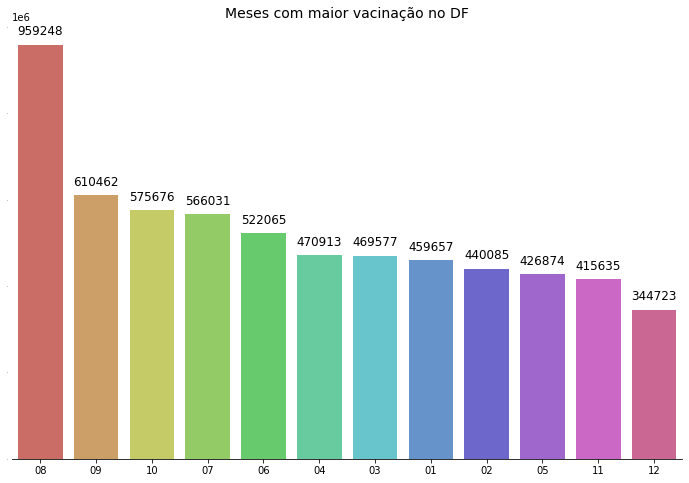

In [68]:
# Gráfico dos meses com maior vacinação no DF
fig, ax = plt.subplots(figsize=(12,8))
sns.despine(left=False)
splot = sns.countplot(x='Vacina_DataAplicacao_Mes_Ano', order=vacinacao_DF['Vacina_DataAplicacao_Mes_Ano'].value_counts().index, data=vacinacao_DF, palette='hls')
plt.title('Meses com maior vacinação no DF',fontsize=14)
plt.ylabel('')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

💭 O mês com maior vacinação no DF, considerando os anos de 2020 a 2022, foi o mês de agosto (08), com 959.248 vacinados, seguido por setembro (09) e outubro (10).

---
### Pessoas de outros Estados que foram vacinados no DF 🗺️

In [28]:
# Contagem de vacinados de outros Estados, exceto o DF.
outrosEstados = vacinacao_DF[vacinacao_DF.paciente_endereco_uf !='DF'].groupby('paciente_endereco_uf')['paciente_endereco_uf'].count().sort_values(ascending=False)
outrosEstados

paciente_endereco_uf
GO      333526
MG       94028
BA       70026
SP       59024
MA       52716
PI       50651
RJ       45321
CE       27479
PB       18092
PA       17622
TO       16925
PE       15311
RS       15198
PR       13422
RN       10395
SC        9518
MT        9307
MS        7647
AM        6736
ES        5837
AL        4369
RO        3766
SE        3721
XX        3290
RR        2891
AC        2800
AP        2135
None       355
Name: paciente_endereco_uf, dtype: int64

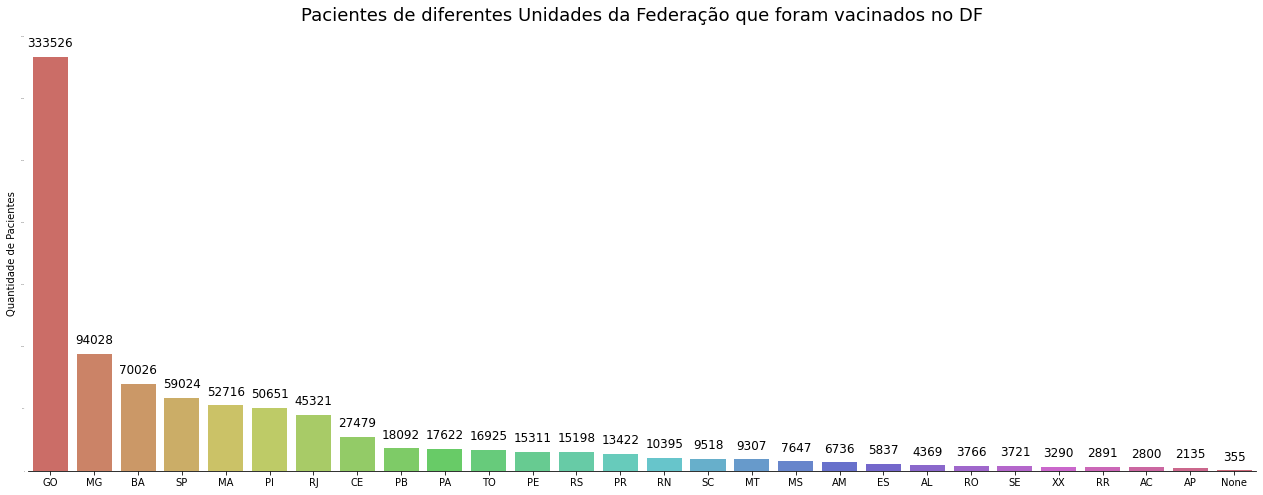

In [69]:
# Geração do gráfico de pessoas vacinadas por UF
fig, ax = plt.subplots(figsize=(22,8))
splot = sns.countplot(x='paciente_endereco_uf', order=outrosEstados.index, data=vacinacao_DF, palette='hls')
plt.title('Pacientes de diferentes Unidades da Federação que foram vacinados no DF',fontsize=18, pad=15)
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

In [34]:
# Calculo da porcentagem de vacinados de cada UF
porcentagemVacinadosUF = (outrosEstados/individuosVacinados*100)
porcentagemVacinadosUF

paciente_endereco_uf
GO      13.466238
MG       3.796416
BA       2.827326
SP       2.383116
MA       2.128428
PI       2.045053
RJ       1.829853
CE       1.109475
PB       0.730471
PA       0.711495
TO       0.683353
PE       0.618187
RS       0.613625
PR       0.541918
RN       0.419702
SC       0.384293
MT       0.375774
MS       0.308751
AM       0.271969
ES       0.235671
AL       0.176400
RO       0.152054
SE       0.150237
XX       0.132835
RR       0.116725
AC       0.113051
AP       0.086201
None     0.014333
Name: paciente_endereco_uf, dtype: float64

💭 Os Estados com maior número de vacinados no DF são: Goiás (13.46%), Minas Gerais (3.79%), Bahia (2.82%) e São Paulo (2.38%).


---
### Vacinados categorizados por Raça/Cor 🧑🏼‍🦱🧑🏾‍🦱

In [32]:
# Total de vacinados por Raça/Cor
vacinacao_DF['paciente_racaCor_valor'].value_counts()

SEM INFORMACAO    2502088
PARDA             1818165
BRANCA            1078120
AMARELA            661645
PRETA              198371
INDIGENA             2554
Name: paciente_racaCor_valor, dtype: int64

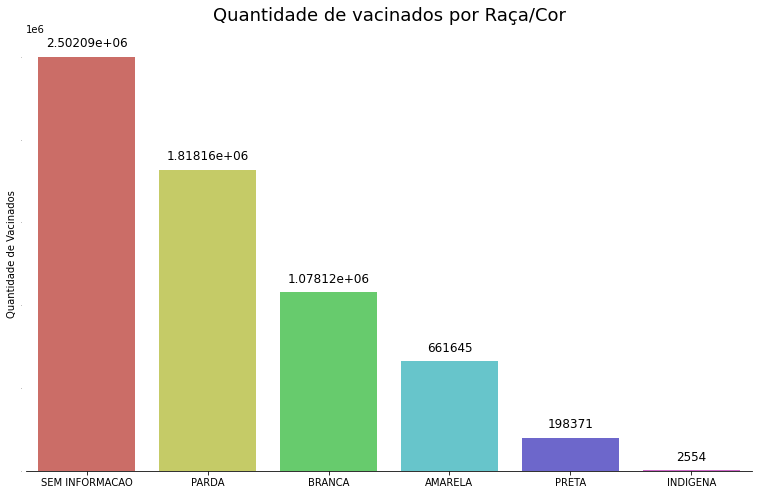

In [70]:
# Geração do gráfico de vacinados por Raça/Cor
fig, ax = plt.subplots(figsize=(13,8))
splot = sns.countplot(x='paciente_racaCor_valor', order=vacinacao_DF['paciente_racaCor_valor'].value_counts().index, data=vacinacao_DF, palette='hls')
plt.title('Quantidade de vacinados por Raça/Cor',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

In [26]:
# Calcula a porcentagem de vacinados por Raça/Cor
vacinacao_DF['paciente_racaCor_valor'].value_counts(normalize=True)

SEM INFORMACAO    0.399634
PARDA             0.290398
BRANCA            0.172198
AMARELA           0.105678
PRETA             0.031684
INDIGENA          0.000408
Name: paciente_racaCor_valor, dtype: float64

💭 Predominam os vacinados que não declararam sua Raça/Cor, com 39,96% dos registros. Em seguida, os pardos (29,03%), brancos (17,21%), amarelos (10,56%), pretos (3,16%) e indígenas (0,004%).

---
### Vacinados categorizados por Sexo 👩‍🦰🧔‍♂️

In [20]:
# Contagem de vacinados por Sexo
vacinacao_DF['paciente_enumSexoBiologico'].value_counts()

F    3409674
M    2851263
I          9
Name: paciente_enumSexoBiologico, dtype: int64

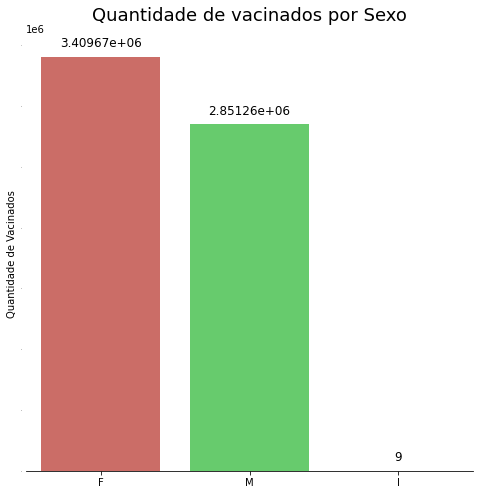

In [73]:
# Geração do gráfico de vacinados por Sexo
fig, ax = plt.subplots(figsize=(8,8))
splot = sns.countplot(x='paciente_enumSexoBiologico', order=vacinacao_DF['paciente_enumSexoBiologico'].value_counts().index, data=vacinacao_DF, palette='hls')
plt.title('Quantidade de vacinados por Sexo',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

In [25]:
# Calcula a porcentagem de vacinados por Sexo
vacinacao_DF['paciente_enumSexoBiologico'].value_counts(normalize=True)

F    0.544594
M    0.455405
I    0.000001
Name: paciente_enumSexoBiologico, dtype: float64

💭 O maior grupo de vacinados é do sexo Feminino (54,45%).

---
### Vacinados por Fabricante da Vacina 💉

In [22]:
# Contagem de doses aplicadas por fabricante
vacinacao_DF['vacina_fabricante_nome'].value_counts()

PFIZER                    2833612
ASTRAZENECA/FIOCRUZ       1614289
SINOVAC/BUTANTAN          1234465
JANSSEN                    358885
ASTRAZENECA                122989
Pendente Identificação      96196
Pendente Identifica??o        510
Name: vacina_fabricante_nome, dtype: int64

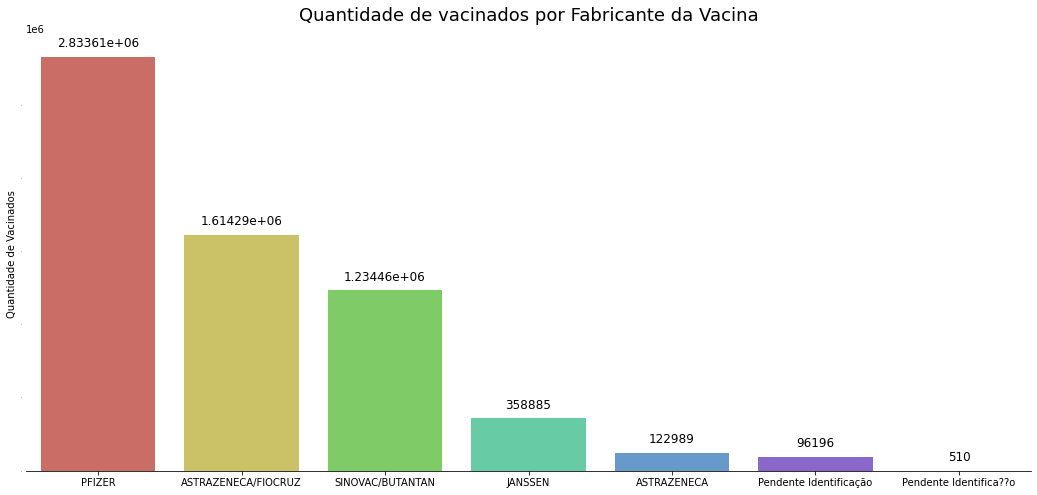

In [74]:
# Geração do gráfico de vacinados por Fabricante
fig, ax = plt.subplots(figsize=(18,8))
splot = sns.countplot(x='vacina_fabricante_nome', order=vacinacao_DF['vacina_fabricante_nome'].value_counts().index, data=vacinacao_DF, palette='hls')
plt.title('Quantidade de vacinados por Fabricante da Vacina',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

In [24]:
# Calcula a porcentagem de vacinados por fabricante
vacinacao_DF['vacina_fabricante_nome'].value_counts()/vacinacao_DF['vacina_fabricante_nome'].value_counts().sum()

PFIZER                    0.452585
ASTRAZENECA/FIOCRUZ       0.257835
SINOVAC/BUTANTAN          0.197169
JANSSEN                   0.057321
ASTRAZENECA               0.019644
Pendente Identificação    0.015364
Pendente Identifica??o    0.000081
Name: vacina_fabricante_nome, dtype: float64

💭 A vacina mais utilizada no DF foi a Pfizer, com 45,25% das doses aplicadas, seguida da Astrazeneca, com 25,78%.

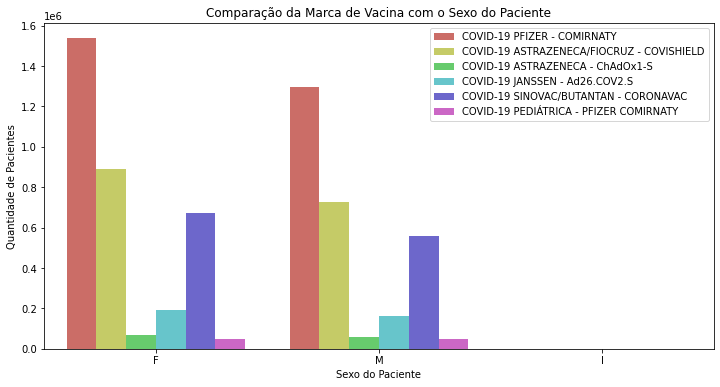

In [47]:
# Faz um gráfico comparando a coluna paciente_enumSexoBiologico com a coluna vacina_nome
plt.figure(figsize=(12,6))
sns.countplot(x='paciente_enumSexoBiologico', hue='vacina_nome', data=vacinacao_DF, palette='hls')
# Altera a legenda do eixo x para Sexo do Paciente
plt.xlabel('Sexo do Paciente')
# Altera a legenda do eixo y para Quantidade de Pacientes
plt.ylabel('Quantidade de Pacientes')
# Título do gráfico: Marca de Vacina - Sexo do Paciente
plt.title('Comparação da Marca de Vacina com o Sexo do Paciente')
# Altera a posição da legenda
plt.legend(loc='upper right')


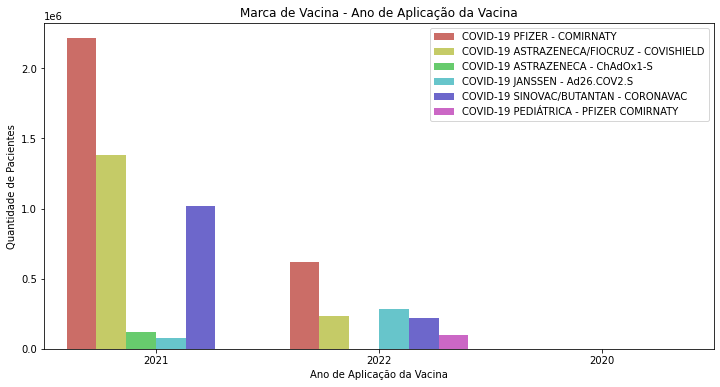

In [48]:
# Faz um gráfico relacionando a coluna Vacina_DataAplicacao_Ano com a coluna vacina_nome
plt.figure(figsize=(12,6))
sns.countplot(x='Vacina_DataAplicacao_Ano', hue='vacina_nome', data=vacinacao_DF, palette='hls')
# Altera a legenda do eixo x para Ano de Aplicação da Vacina
plt.xlabel('Ano de Aplicação da Vacina')
# Altera a legenda do eixo y para Quantidade de Pacientes
plt.ylabel('Quantidade de Pacientes')
# Título do gráfico: Marca de Vacina - Ano de Aplicação da Vacina
plt.title('Marca de Vacina - Ano de Aplicação da Vacina')
# Altera a posição da legenda
plt.legend(loc='upper right')

---
### Quantidade de vacinados por Ano 📅

In [44]:
vacinacao_DF['Vacina_DataAplicacao_Ano'].value_counts()

2021    4811223
2022    1448637
2020       1088
Name: Vacina_DataAplicacao_Ano, dtype: int64

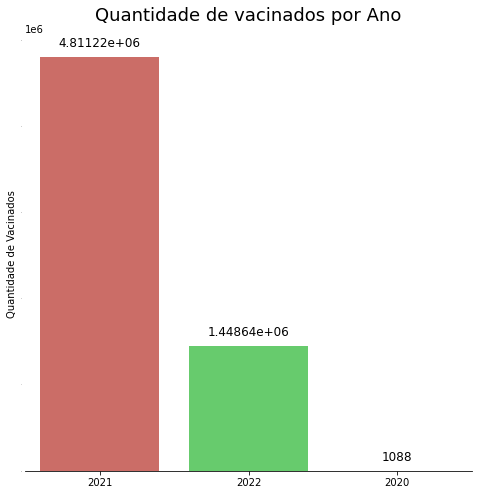

In [75]:
# Geração do gráfico de vacinados por Ano
fig, ax = plt.subplots(figsize=(8,8))
splot = sns.countplot(x='Vacina_DataAplicacao_Ano', order=vacinacao_DF['Vacina_DataAplicacao_Ano'].value_counts().index, data=vacinacao_DF, palette='hls')
plt.title('Quantidade de vacinados por Ano',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

---
### Vacinados por Idade 🎂

In [46]:
vacinacao_DF['paciente_idade'].value_counts()

39     123694
40     123164
41     119874
38     119387
42     117091
        ...  
1           5
112         3
114         3
113         1
122         1
Name: paciente_idade, Length: 117, dtype: int64

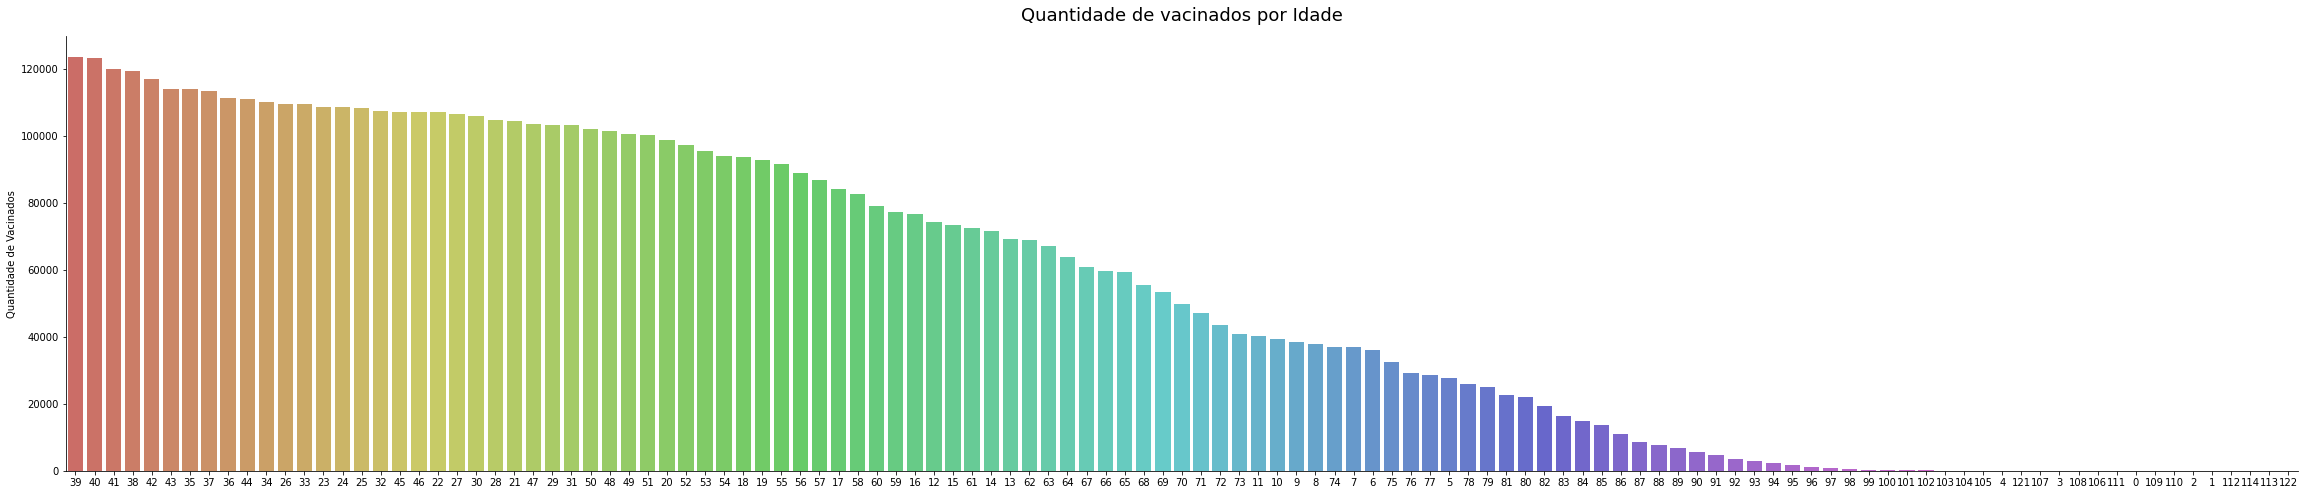

In [76]:
# Geração do gráfico de vacinados por Idade
fig, ax = plt.subplots(figsize=(40,8))
splot = sns.countplot(x='paciente_idade', order=vacinacao_DF['paciente_idade'].value_counts().index, data=vacinacao_DF, palette='hls')
plt.title('Quantidade de vacinados por Idade',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=False) # retirada da moldura

Text(-14.950000000000003, 0.5, 'Quantidade de Pacientes')

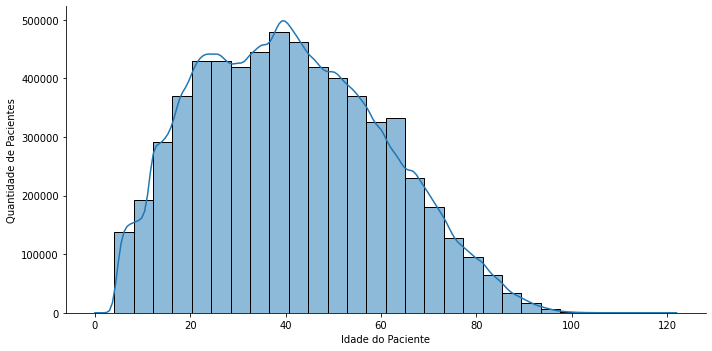

In [49]:
# Constrói um gráfico com as idades dos pacientes
sns.displot(vacinacao_DF['paciente_idade'], bins=30, kde=True, palette='flare',aspect=2)

# Altera a legenda do eixo x para Idade do Paciente
plt.xlabel('Idade do Paciente')

# Altera a legenda do eixo y para Quantidade de Pacientes
plt.ylabel('Quantidade de Pacientes')


---
### Vacinados por Doses 💉

In [50]:
vacinacao_DF['vacina_descricao_dose'].value_counts()

1ª Dose                2476758
2ª Dose                2283427
Reforço                1176854
2º Reforço              207095
Dose                     62864
Dose Adicional           53344
Única                      395
2ª Dose Revacinação         94
1ª Dose Revacinação         60
3ª Dose                     54
Dose Inicial                 1
4ª Dose                      1
3ª Dose Revacinação          1
Name: vacina_descricao_dose, dtype: int64

Text(0, 0.5, '')

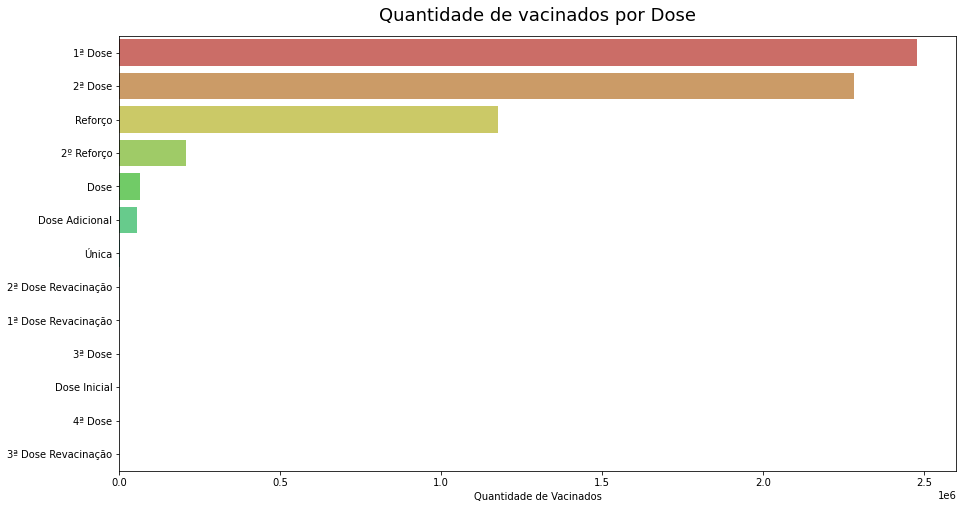

In [60]:
# Geração do gráfico de vacinados por Doses
fig, ax = plt.subplots(figsize=(15,8))
splot = sns.countplot(y='vacina_descricao_dose', order=vacinacao_DF['vacina_descricao_dose'].value_counts().index, data=vacinacao_DF, palette='hls')
plt.title('Quantidade de vacinados por Dose',fontsize=18, pad=15)
plt.xlabel('Quantidade de Vacinados')
plt.ylabel('')

---
### Vacinação por Unidade de Saúde 🏥

In [50]:
# Qual foi o estalecimento que mais aparece na coluna estalecimento_noFantasia?
vacinacao_DF['estalecimento_noFantasia'].value_counts().index[0]

'UBS 01 ASA SUL'

Text(0.5, 1.0, 'Unidades de Saúde com Maior Vacinação')

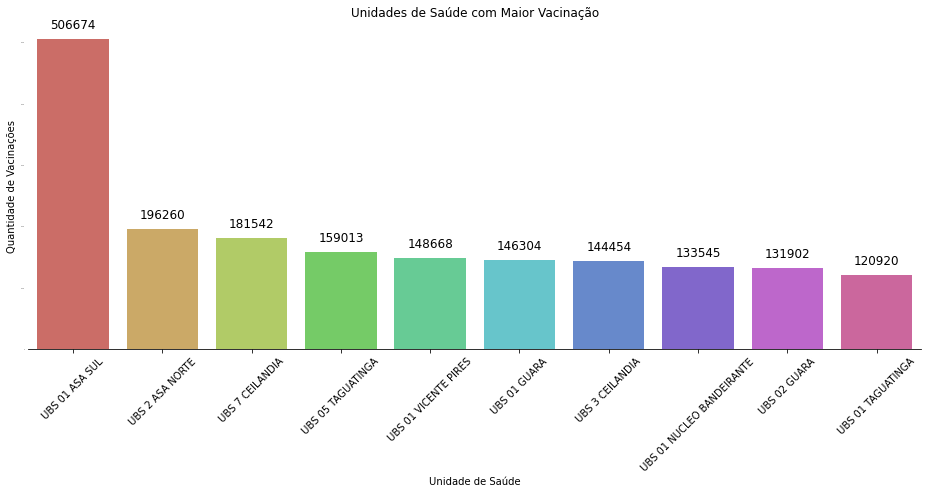

In [53]:
# Constrói um gráfico com as dez primeiras quantidade de vacinações por estabelecimento em ordem decrescente
fig, ax = plt.subplots(figsize=(16,6))
splot = sns.countplot(x='estalecimento_noFantasia', order=vacinacao_DF['estalecimento_noFantasia'].value_counts().index[:10], data=vacinacao_DF, palette='hls')
sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

# Rotaciona a legenda do eixo X em 90 graus
plt.xticks(rotation=45)
# Altera a legenda do eixo x para Unidade de Saúde
plt.xlabel('Unidade de Saúde')
# Altera a legenda do eixo y para Quantidade de Vacinações
plt.ylabel('Quantidade de Vacinações')
# Título do gráfico como Unidades de Saúde com Maior Vacinação
plt.title('Unidades de Saúde com Maior Vacinação')

In [54]:
# Calcula a porcentagem de vacinações por estabelecimento
vacinacao_DF['estalecimento_noFantasia'].value_counts()/vacinacao_DF['estalecimento_noFantasia'].value_counts().sum()


UBS 01 ASA SUL                                   8.092611e-02
UBS 2 ASA NORTE                                  3.134670e-02
UBS 7 CEILANDIA                                  2.899594e-02
UBS 05 TAGUATINGA                                2.539760e-02
UBS 01 VICENTE PIRES                             2.374529e-02
                                                     ...     
UBS 04 RIACHO FUNDO II CAUB I                    3.194405e-07
UBS 4 CEILANDIA                                  3.194405e-07
UBS 8 SANTA MARIA                                3.194405e-07
UBS 6 SAO FRANCISCO SAO SEBASTIAO                1.597203e-07
CENTRAL REGIONAL DE REDE DE FRIO DA REGIAO DE    1.597203e-07
Name: estalecimento_noFantasia, Length: 169, dtype: float64

💭 A Unidade de Saúde Básica 01 da Asa Sul vacinou 8.09% da população de vacinados no DF.

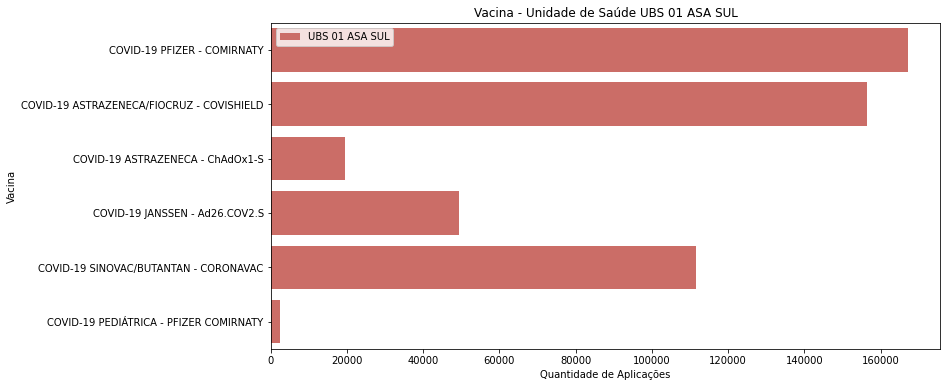

In [62]:
# Cria um gráfico relacionando estalecimento_noFantasia == 'UBS 01 ASA SUL' com a coluna vacina_nome
plt.figure(figsize=(12,6))
sns.countplot(y='vacina_nome', hue='estalecimento_noFantasia', data=vacinacao_DF, palette='hls', hue_order=['UBS 01 ASA SUL'])

# Altera a legenda do eixo x para Vacina
plt.ylabel('Vacina')
# Altera a legenda do eixo y para Quantidade de Pacientes
plt.xlabel('Quantidade de Aplicações')
# Título do gráfico: Vacina - Unidade de Saúde
plt.title('Vacina - Unidade de Saúde UBS 01 ASA SUL')
# Altera a posição da legenda
plt.legend(loc='upper left')

💭 A vacina mais aplicada na UBS 01 Asa Sul foi a Pfizer/Comirnaty. 

---
### Lotes de vacinas com maior aplicação no DF 💉

In [64]:
# Qual foi o lote de vacinação com maior aplicação?
vacinacao_DF['vacina_lote'].value_counts()

FL4222       194062
FG3528       189646
FD7221       177937
FD7207       156000
FG3531       138446
              ...  
106182-17         1
EW01Q5            1
106184-03         1
28235B            1
106184-16         1
Name: vacina_lote, Length: 593, dtype: int64

Text(0.5, 1.0, 'Lotes de Vacinas com Maior Aplicação')

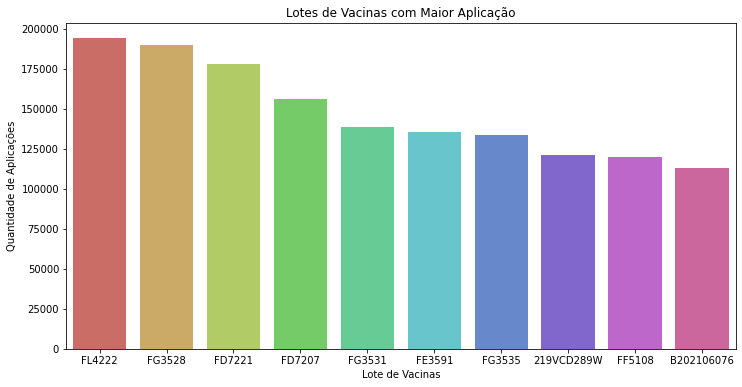

In [65]:
# Grafico de barras com as dez primeiras doses com maior aplicação por lote em ordem decrescente
plt.figure(figsize=(12,6))
sns.countplot(x='vacina_lote', order=vacinacao_DF['vacina_lote'].value_counts().index[:10], data=vacinacao_DF, palette='hls')

# Altera a legenda do eixo x para Dose
plt.xlabel('Lote de Vacinas')

# Altera a legenda do eixo y para Quantidade de Pacientes
plt.ylabel('Quantidade de Aplicações')

# Título do gráfico como Lotes de Vacinas com Maior Aplicação
plt.title('Lotes de Vacinas com Maior Aplicação')

---
### Grupos de Atendimento com maior aplicação de doses 📊

In [66]:
# Valores possíveis na coluna vacina_grupoAtendimento_nome
vacinacao_DF['vacina_grupoAtendimento_nome'].value_counts()

Pessoas de 18 a 64 anos                      3441641
Pessoas de 12 a 17 anos                       426542
Pessoas de 65 a 69 anos                       276885
Pessoas de 5 a 11 anos                        254841
Pessoas de 70 a 74 anos                       207125
                                              ...   
Técnico em Saúde Bucal - TSB                      42
Crianças Indígenas                                39
Indivíduos Transplantados de Medula Óssea         13
Crianças Quilombolas                               3
Crianças Ribeirinhas                               2
Name: vacina_grupoAtendimento_nome, Length: 92, dtype: int64

Text(0.5, 1.0, 'Grupos de Atendimento com Maior Aplicação')

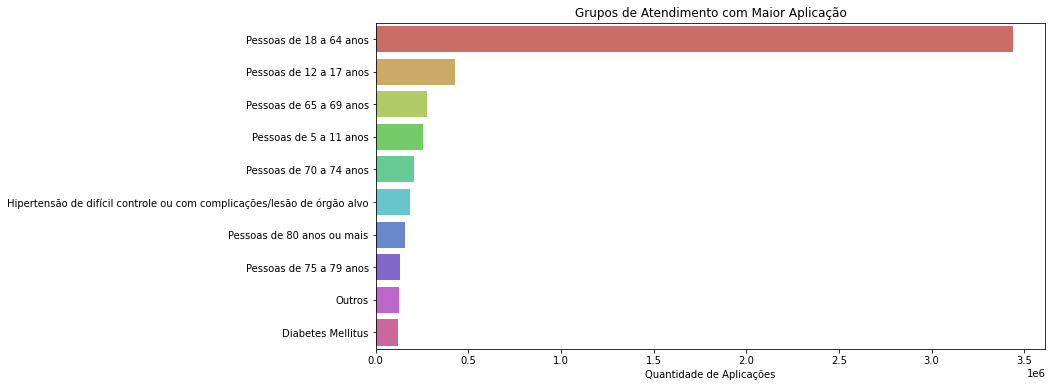

In [67]:
# Gráfico contendo as doses aplicadas nos dez maiores grupos de atendimento
plt.figure(figsize=(12,6))
sns.countplot(y='vacina_grupoAtendimento_nome', order=vacinacao_DF['vacina_grupoAtendimento_nome'].value_counts().index[:10], data=vacinacao_DF, palette='hls')

# troca a legenda do eixo x para Grupo de Atendimento
plt.ylabel('')

# Altera a legenda do eixo y para Quantidade de Pacientes
plt.xlabel('Quantidade de Aplicações')

# Título do gráfico como Grupo de Atendimento com Maior Aplicação
plt.title('Grupos de Atendimento com Maior Aplicação')


---
### Vacinados de 5 a 11 anos por Dose da Vacina 🧒💉

In [77]:
criancas = vacinacao_DF[vacinacao_DF.vacina_grupoAtendimento_nome=='Pessoas de 5 a 11 anos'].groupby('vacina_descricao_dose')['vacina_grupoAtendimento_nome'].count().sort_values(ascending=False)
criancas

vacina_descricao_dose
1ª Dose           153325
2ª Dose           101239
Reforço              214
2º Reforço            28
Dose Adicional        19
Dose                  17
Name: vacina_grupoAtendimento_nome, dtype: int64

Text(0.5, 1.0, 'Dose com Maior Aplicação em Crianças de 5 a 11 anos')

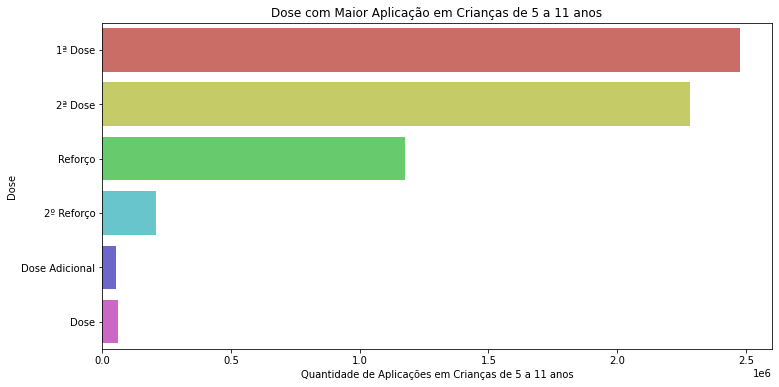

In [80]:
# Cria um gráfico com os valores de criancas por dose
plt.figure(figsize=(12,6))
sns.countplot(y='vacina_descricao_dose', order=vacinacao_DF[vacinacao_DF.vacina_grupoAtendimento_nome=='Pessoas de 5 a 11 anos'].groupby('vacina_descricao_dose')['vacina_grupoAtendimento_nome'].count().sort_values(ascending=False).index[:10], data=vacinacao_DF, palette='hls')

# Troca a legenda do eixo x para Dose
plt.ylabel('Dose')

# Troca a legenda do eixo y para Quantidade de Pacientes
plt.xlabel('Quantidade de Aplicações em Crianças de 5 a 11 anos')

# Título do gráfico como Dose com Maior Aplicação em Crianças de 5 a 11 anos
plt.title('Dose com Maior Aplicação em Crianças de 5 a 11 anos')